referensi https://www.kaggle.com/omercansvgn/heart-attack-artificial-neural-networks

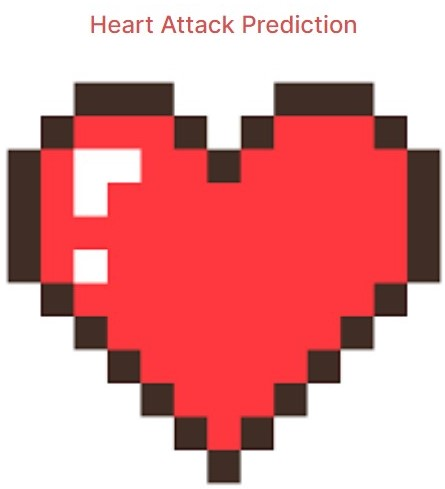

In [4]:
import pandas as pd

In [33]:
data = pd.read_csv('../ann/heart.csv')
data.head()
# Here is our data set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


di atas tersebut adalah sebuah datasheet umur, gender, dan lain lain mengenai heart attack atau serangan jantung

                                            Pemeriksaan Nilai Hilang

In [34]:
data.isnull().sum()
# This is beautiful, there is no missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Kita perlu memeriksa situasi yang kontradiktif, tetapi sebelum itu, ada baiknya melihat korelasi antar variabel. 

Kontradiktif berarti bersifat kontradiksi. Kontradiksi itu sendiri adalah pertentangan antara dua hal yang sangat berlawanan atau bertentangan.

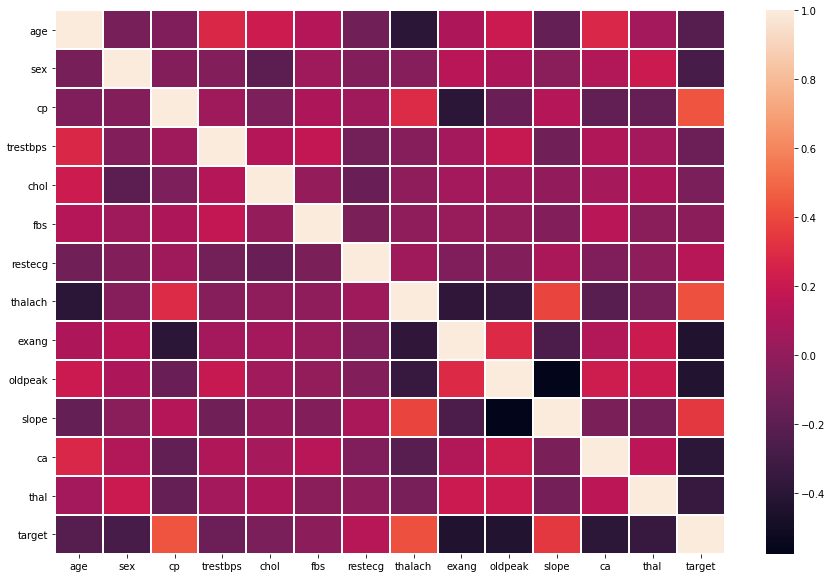

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=False,linewidths=1);

Thalach, Slope, CP, mempengaruhi output.

                                            Thalach: Pengamatan kontradiktif

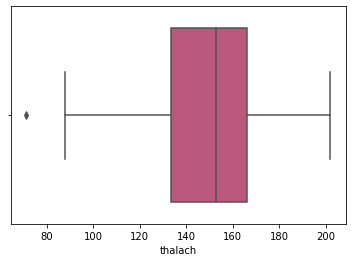

In [35]:
sns.boxplot(data['thalach'],palette='plasma_r');
# I want to believe that this outlier will not affect us much.

                                        Slope : Pengamatan Kontradiktif

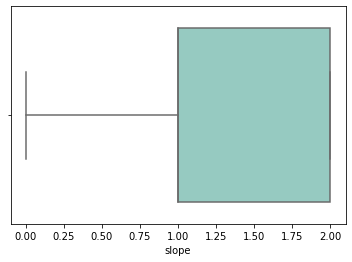

In [36]:
sns.boxplot(data['slope'],palette='Set3');
# Just fine

                                            CP : Pengamatan Kontradiktif

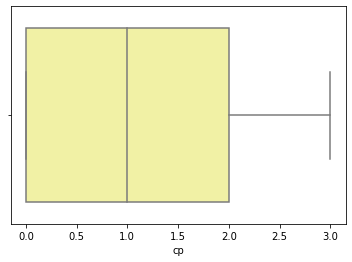

In [37]:
sns.boxplot(data['cp'],palette='terrain');
# Done

tidak ada data memiliki nilai yang hilang, pengamatan yang kontradiktif tidak menjadi masalah, bisa dilihat ini adalah saraf tiruan yang hampir bisa dikatakan sempurna

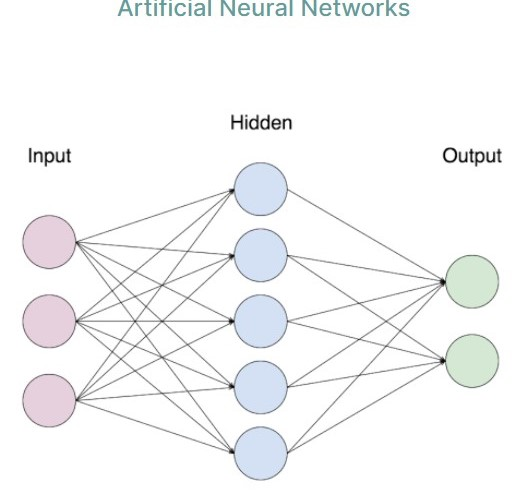

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score

# Here are the libraries we need

In [14]:
y = data['target']
x = data.drop(['target'],axis=1)
# Y is our target variable
# X contains arguments

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
# Train and test separation.

In [18]:
from sklearn.preprocessing import StandardScaler
# Here is the necessary library.

In [20]:
Scaler = StandardScaler() # We create a scaling object.
Scaler.fit(x_train) # We fit this to x_train.
x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)
# We have now standardized the sets to be used.

In [22]:
from sklearn.neural_network import MLPClassifier # Our artificial neural network library.
MLPC = MLPClassifier().fit(x_train_scaled,y_train) # We use x_train_scaled.
y_prediction = MLPC.predict(x_test_scaled) # We test with standardized x test.
print(y_prediction[:10]) # Estimated y values

[0 1 1 0 1 1 1 0 0 1]


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
NewData = pd.DataFrame({'Real_Y_Values':y_test,
                       'Prediction_Y_Values':y_prediction})
NewData.head()
# Actual and predicted y values.

,Real_Y_Values,Prediction_Y_Values
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1


In [38]:
accuracy_score(y_test,y_prediction)
# Pretty good test success but not over.

0.8571428571428571

parameter tersebut bisa dioptimalkan, akan dilakukan pengoreksian pada setiap model. setelahnya baru dapat meningkatkan estimasi yang ada

In [39]:
MLPC_params = {
    'alpha':[0.1,0.01,0.02,0.005,0.0001,0.00001],
    'hidden_layer_sizes':[(10,10,10),
                         (100,100,100),
                         (100,100),
                         (3,5),
                         (5,3)],
    'solver':['lbfgs','adam','sgd'],
    'activation':['relu','logistic']
}
MLPC = MLPClassifier() # Clean models
MLPC_cv_model = GridSearchCV(MLPC,MLPC_params,cv=10,n_jobs=-1,verbose=2)
MLPC_cv_model.fit(x_train_scaled,y_train)
# If you don't know this method, gridsearch cv python --> investigate

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.0min finished
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

search diatas complete hanya saja memakan waktu yang lumayan lama.

In [30]:
print('Best parameter for you <3:' + str(MLPC_cv_model.best_params_))

Best parameter for you <3:{'activation': 'logistic', 'alpha': 1e-05, 'hidden_layer_sizes': (5, 3), 'solver': 'lbfgs'}


In [32]:
MLPC_tuned = MLPClassifier(activation=MLPC_cv_model.best_params_['activation'],
                            alpha=MLPC_cv_model.best_params_['alpha'],
                            hidden_layer_sizes=MLPC_cv_model.best_params_['hidden_layer_sizes'],
                            solver=MLPC_cv_model.best_params_['solver'])
MLPC_tuned.fit(x_train_scaled,y_train)
y_pred_tuned = MLPC_tuned.predict(x_test_scaled)
accuracy_score(y_test,y_pred_tuned)

0.7692307692307693

dari program diatas dapat disimpulkan bahwa heart attack prediction bisa dipengaruhi oleh Thalac, Slope, CP. 